In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow

jump = pd.read_csv("/content/drive/MyDrive/data/Jumping.csv")    # Read csv file which stored in data folder
lyingback = pd.read_csv("/content/drive/MyDrive/data/lying back.csv")          # Read csv file which stored in data folder
run = pd.read_csv("/content/drive/MyDrive/data/Running.csv")        # Read csv file which stored in data folder
sit = pd.read_csv("/content/drive/MyDrive/data/Sitting.csv")
stand = pd.read_csv("/content/drive/MyDrive/data/Standing.csv")
walk = pd.read_csv("/content/drive/MyDrive/data/Walking.csv")

In [ ]:
print(jump.shape)
print(lyingback.shape)
print(run.shape)
print(sit.shape)
print(stand.shape)
print(walk.shape)

(750, 47)
(750, 47)
(750, 47)
(750, 47)
(750, 47)
(750, 47)


In [ ]:
data_all = pd.DataFrame()
data_all = data_all.append([jump,lyingback,run,sit,stand,walk])
data_all.shape

(4500, 47)

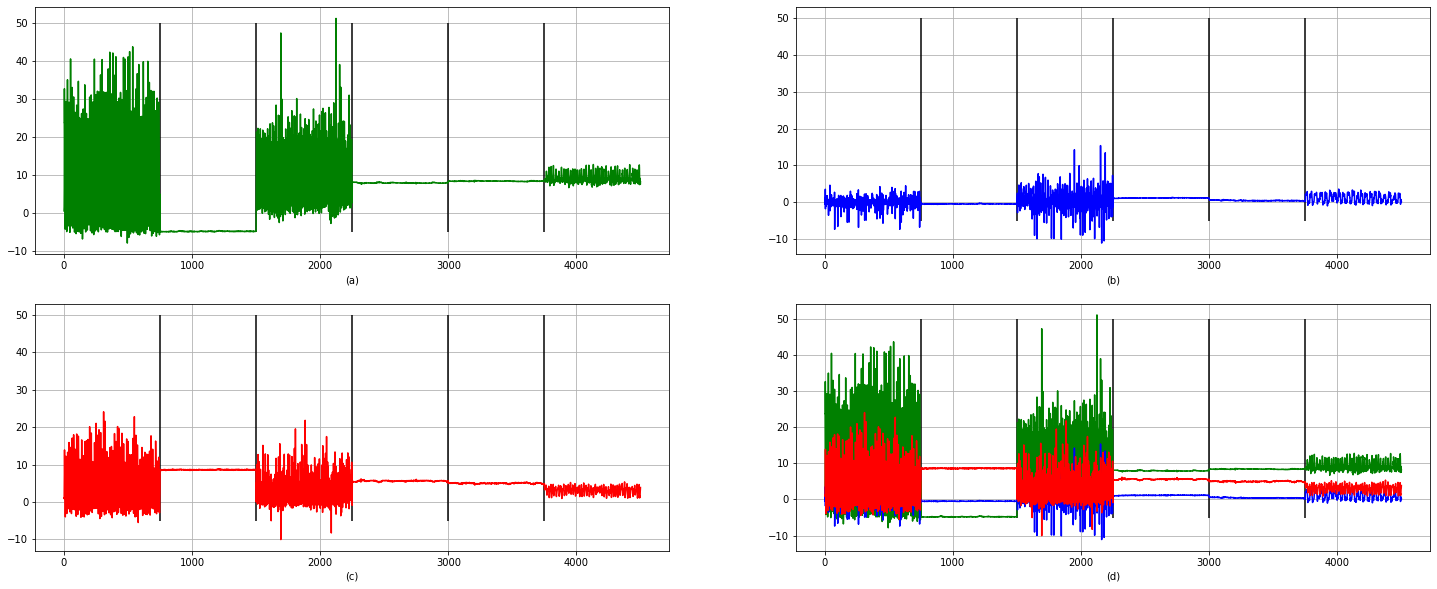

In [ ]:
def action_divide():
    plt.vlines(x=750, ymin=-5, ymax=50)      
    plt.vlines(x=1500, ymin=-5, ymax=50)  
    plt.vlines(x=2250, ymin=-5, ymax=50)     
    plt.vlines(x=3000, ymin=-5, ymax=50)    
    plt.vlines(x=3750, ymin=-5, ymax=50)     
                                                
                                                

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)

plt.subplot(2,2,1)
plt.plot(data_all.id,data_all.T_ax,'g')     # Plot Accelerometer X-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(a)")
plt.grid()

plt.subplot(2,2,2)
plt.plot(data_all.id,data_all.T_ay,'b')     # Plot Accelerometer X-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(b)")
plt.grid()

plt.subplot(2,2,3)
plt.plot(data_all.id,data_all.T_az,'r')     # Plot Accelerometer Z-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(c)")
plt.grid()

plt.subplot(2,2,4)
plt.plot(data_all.id,data_all.T_ax,'g')
plt.plot(data_all.id,data_all.T_ay,'b')
plt.plot(data_all.id,data_all.T_az,'r')     # Plot Accelerometer All-Axis data of ForeArm sensor
action_divide()
plt.xlabel("(d)")
plt.grid()

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
label = LabelEncoder()
data_all['label'] = label.fit_transform(data_all['action'])

x = data_all.drop(['label','id','action','T_mx','T_my','T_mz','RA_mx','RA_my','RA_mz','LA_mx','LA_my','LA_mz','RL_mx','RL_my','RL_mz','LL_mx','LL_my','LL_mz'], axis=1)
x = x.drop(['LA_ax','LA_ay','LA_az','LA_gx','LA_gy','LA_gz','LL_ax','LL_ay','LL_az','LL_gx','LL_gy','LL_gz'], axis=1)
y = data_all['label']

x.shape
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data = x, columns=['T_ax','T_ay','T_az','T_gx','T_gy','T_gz','RA_ax','RA_ay','RA_az','RA_gx','RA_gy','RA_gz','RL_ax','RL_ay','RL_az','RL_gx','RL_gy','RL_gz'])
scaled_x['label'] = y.values

scaled_x

,T_ax,T_ay,T_az,T_gx,T_gy,T_gz,RA_ax,RA_ay,RA_az,RA_gx,RA_gy,RA_gz,RL_ax,RL_ay,RL_az,RL_gx,RL_gy,RL_gz,label
0,-0.772495,-0.654842,-1.116490,0.348737,-0.289154,0.328319,-0.905444,-1.347947,-1.727403,-0.541188,0.870668,-0.181229,0.975432,-0.487296,0.854458,0.105892,-0.427082,0.091283,0
1,-0.644064,-0.622888,-1.194738,0.640466,0.291253,0.326782,-0.780252,-0.731128,-1.764044,1.372008,1.583385,-0.205322,0.347358,-0.062271,-0.500109,-1.141109,0.985965,0.163093,0
2,0.002693,-0.414688,0.513653,0.650605,-0.687034,0.837914,-0.842860,2.126609,-1.769049,2.225374,1.871223,1.181647,-4.144332,1.654809,-0.613405,-1.123639,0.571425,0.905816,0
3,3.415888,2.179256,2.536402,0.560595,-0.939849,-1.378674,0.519583,4.562300,-0.532761,1.852119,-0.398263,1.096976,-0.755905,-1.703946,2.009366,-1.337848,1.190612,1.916829,0
4,2.240179,-1.595897,2.716072,-0.399914,1.651008,1.098166,1.149295,4.516075,3.120338,1.494188,2.851613,-0.366803,-2.551061,-1.301001,-0.938539,3.916470,-0.502163,-0.711271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.346823,0.119510,-0.912823,0.656030,-0.104910,0.314855,1.216344,-0.535813,-0.998198,0.502118,1.579433,-1.713888,-0.244496,-0.284711,-0.923701,0.807559,0.118972,-0.979778,5
4496,0.315520,0.192167,-0.673612,0.330565,0.126396,-0.097116,0.943019,-0.557315,-0.938167,1.106827,1.339072,-1.787773,-0.234327,-0.208098,-0.218844,0.148437,0.327110,-1.055321,5
4497,0.190697,-0.150717,-0.546973,0.163124,0.094888,-0.123811,0.775632,-0.442548,-0.975906,0.900722,0.827197,-1.394865,-0.331526,-0.392413,0.229148,0.092551,0.158060,-0.975940,5
4498,0.139972,-0.348491,-0.534975,0.143273,-0.029531,0.088000,0.736066,-0.477164,-0.942865,0.067519,0.186937,-0.865398,-0.254651,-0.536776,-0.145001,-0.025428,0.132108,-0.931539,5


In [ ]:
import scipy.stats as stats

frame_size = 100
hop_size = 25

def get_frames(df,frame_size, hop_size):
  N_FEATURES = 18

  frames = []
  labels = []

  for i in range(0,len(df) - frame_size,hop_size):
    T_ax = df['T_ax'].values[i: i + frame_size]
    T_ay = df['T_ay'].values[i: i + frame_size]
    T_az = df['T_az'].values[i: i + frame_size]
    T_gx = df['T_gx'].values[i: i + frame_size]
    T_gy = df['T_gy'].values[i: i + frame_size]
    T_gz = df['T_gz'].values[i: i + frame_size]
    RA_ax = df['RA_ax'].values[i: i + frame_size]
    RA_ay = df['RA_ay'].values[i: i + frame_size]
    RA_az = df['RA_az'].values[i: i + frame_size]
    RA_gx = df['RA_gx'].values[i: i + frame_size]
    RA_gy = df['RA_gy'].values[i: i + frame_size]
    RA_gz = df['RA_gz'].values[i: i + frame_size]
    RL_ax = df['RL_ax'].values[i: i + frame_size]
    RL_ay = df['RL_ay'].values[i: i + frame_size]
    RL_az = df['RL_az'].values[i: i + frame_size]
    RL_gx = df['RL_gx'].values[i: i + frame_size]
    RL_gy = df['RL_gy'].values[i: i + frame_size]
    RL_gz = df['RL_gz'].values[i: i + frame_size]

    label = stats.mode(df['label'][i: i + frame_size])[0][0]
    frames.append([T_ax,T_ay,T_az,T_gx,T_gy,T_gz,RA_ax,RA_ay,RA_az,RA_gx,RA_gy,RA_gz,RL_ax,RL_ay,RL_az,RL_gx,RL_gy,RL_gz])
    labels.append(label)

  frames = np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
  labels = np.asarray(labels)

  return frames, labels

In [ ]:
x,y = get_frames(scaled_x,frame_size,hop_size)
x.shape,y.shape

((176, 100, 18), (176,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =0, stratify=y)
x_train.shape, x_test.shape

((140, 100, 18), (36, 100, 18))

In [ ]:
x_train = x_train.reshape(140,100,18,1)
x_test = x_test.reshape(36,100,18,1)

x_train[0].shape, x_test[0].shape

((100, 18, 1), (100, 18, 1))

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(16, (2,2), activation = 'relu', input_shape = x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32,(2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation = 'softmax'))

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(LSTM(32,return_sequences=True, input_shape = (frame_size, 18),
               kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name = 'lstm_1'))

model.add(Flatten(name='flatten'))
model.add(Dense(64, activation='relu',kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='dense_1' ))
model.add(Dense(len(np.unique(y_train)), activation='softmax', 
                kernel_regularizer = l2(0.000001), bias_regularizer = l2(0.000001), name='output'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 32)           6528      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense_1 (Dense)             (None, 64)                204864    
                                                                 
 output (Dense)              (None, 6)                 390       
                                                                 
Total params: 211,782
Trainable params: 211,782
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

#prepare callbacks
from keras.callbacks import ModelCheckpoint

callbacks = [ModelCheckpoint('model_LSTM.h5',save_weights_only=False, save_best_only=True, verbose=1)]

In [ ]:
history = model.fit(x_train,y_train, epochs=20, validation_data=(x_test,y_test), callbacks=callbacks)

# stopping training here
# loading the best saved model 

from keras.models import load_model
model=load_model('model_LSTM.h5')
model.summary()

Epoch 1/20
5/5 [==============================] - ETA: 0s - loss: 1.3234 - accuracy: 0.5643
Epoch 1: val_loss improved from inf to 0.83335, saving model to model_LSTM.h5
5/5 [==============================] - 3s 257ms/step - loss: 1.3234 - accuracy: 0.5643 - val_loss: 0.8334 - val_accuracy: 0.7500
Epoch 2/20
4/5 [=======================>......] - ETA: 0s - loss: 0.5088 - accuracy: 0.9375
Epoch 2: val_loss improved from 0.83335 to 0.43621, saving model to model_LSTM.h5
5/5 [==============================] - 0s 59ms/step - loss: 0.4750 - accuracy: 0.9429 - val_loss: 0.4362 - val_accuracy: 0.9444
Epoch 3/20
5/5 [==============================] - ETA: 0s - loss: 0.1671 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.43621 to 0.25451, saving model to model_LSTM.h5
5/5 [==============================] - 0s 58ms/step - loss: 0.1671 - accuracy: 1.0000 - val_loss: 0.2545 - val_accuracy: 0.9722
Epoch 4/20
5/5 [==============================] - ETA: 0s - loss: 0.0595 - accuracy: 1.0000
Epoch

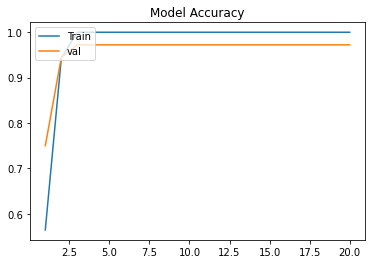

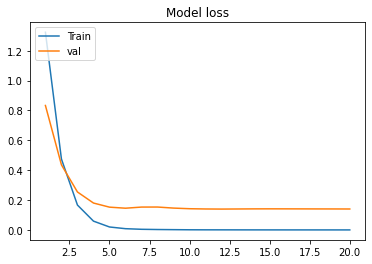

In [ ]:
def plot_learning(history, epochs):
  epoch_range = range(1, epochs+1)

  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.legend(['Train','val'], loc='upper left')
  plt.show()

plot_learning(history, 20)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3392812490>)

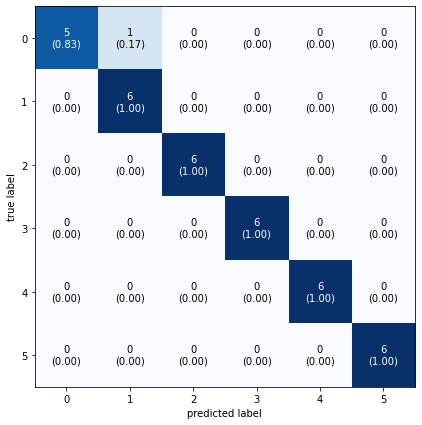

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)

mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat, show_normed=True, figsize=(7,7))

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 1s 19ms/step - loss: 0.1402 - accuracy: 0.9722


[0.14018088579177856, 0.9722222089767456]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print("Classification Report: \n", classification_report(y_test,y_pred))#classification report

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.98      0.97      0.97        36

